
# Problem Statement


ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

# Importing libraries

In [36]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Dataset Details: 


The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.
1.   BRCA - Breast Cancer 
2.   KIRC - Kidney Renal Cancer 
3.   COAD - Colon Cancer
4.   LUAD - Lung Cancer
5.   PRAD - Prostrate Cancer

# Data Retrieval

In [37]:
#!unzip /content/Dataset.zip

In [38]:
df_data = pd.read_csv('data.csv')

In [39]:
df_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [40]:
df_label = pd.read_csv('labels.csv')

In [41]:
df_data.rename(columns={'Unnamed: 0':'sample'}, inplace=True )

In [42]:
df_label.columns

Index(['Unnamed: 0', 'Class'], dtype='object')

In [43]:
df_label.rename(columns={'Unnamed: 0':'sample'}, inplace=True )

## Merge both the datasets - data.csv and labels.csv

In [44]:
df = pd.merge(df_data,df_label,on="sample")
df

,sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


## Get the different label types

In [45]:
y_label = df[['Class']]


In [46]:
df['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [47]:
y_label.value_counts()

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

## Distribution of each cancer type

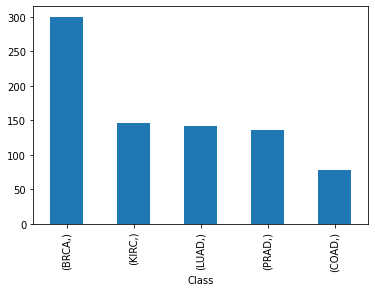

In [48]:
y_label.value_counts().plot(kind='bar')

In [49]:
# Convert the categorical columns (string) to numeric, so they are in machine readable format.
from sklearn.preprocessing import LabelEncoder
y = y_label.apply(LabelEncoder().fit_transform)
y

,Class
0,4
1,3
2,4
3,4
4,0
...,...
796,0
797,3
798,1
799,4


In [50]:
print(y)

     Class
0        4
1        3
2        4
3        4
4        0
..     ...
796      0
797      3
798      1
799      4
800      4

[801 rows x 1 columns]


In [51]:
df_data = df_data.drop('sample',axis=1)

In [52]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


## Missing or null values Check

In [53]:
df_data.isnull().sum().sort_values(ascending=False)

gene_0        0
gene_13794    0
gene_13692    0
gene_13691    0
gene_13690    0
             ..
gene_6842     0
gene_6841     0
gene_6840     0
gene_6839     0
gene_20530    0
Length: 20531, dtype: int64

There are no null values in the dataset.


## Dimensionality Reduction

Data attributes that are very similar to one another do not carry any useful
information. PCA removes the low variance problem. PCA is a dimensionality reduction technique which reduces the number of features, by only keeping the features with maximum variance.

### Scaling the data

In [54]:
# Before applying PCA, the data needs to be centered and scaled. 
cols = df_data.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(df_data),columns=cols)
x_scaled

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.194799,-0.954328,-0.354155,0.983356,0.380054,0.0,-0.578502,-0.005819,-0.125376,-0.065633,...,0.256806,0.584642,-0.135605,-0.152573,-0.238559,0.431432,-0.589804,0.890943,1.587933,-0.261901
797,-0.194799,0.776655,1.275624,-0.588497,0.480533,0.0,-0.076907,-0.983088,-0.125376,-0.065633,...,0.637193,1.422436,-0.612944,0.717105,-1.270672,-0.162408,0.279202,-1.499107,1.993137,-0.261901
798,-0.194799,0.198881,0.574816,2.292529,-0.611452,0.0,0.118352,2.578699,-0.125376,-0.065633,...,-0.237537,-0.257444,1.132504,-0.528281,-0.733465,0.654847,0.906442,-0.220082,-0.410467,1.348558
799,-0.194799,-0.350453,-0.288632,0.934054,0.342783,0.0,1.632398,-0.983088,-0.125376,-0.065633,...,-0.149258,-0.266264,2.502171,-0.042767,-0.216665,-0.811922,0.310652,1.437193,0.091951,-0.261901


In [55]:
# Scaled data has a standard deviation close to 1 and mean close to 0.
x_scaled.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,801.0,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,...,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02
mean,7.352975e-17,-4.920464e-17,5.250343e-16,1.298725e-16,-2.066595e-16,0.0,-3.579464e-16,4.463069e-17,4.010525e-16,-2.972030e-16,...,-1.142102e-15,-7.258724e-16,-2.391553e-15,4.546232e-17,1.677532e-15,-1.810384e-15,8.769514e-16,2.731204e-16,-2.564879e-16,2.171934e-16
std,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,0.0,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,...,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00
min,-1.947993e-01,-2.508929e+00,-2.906607e+00,-2.683220e+00,-2.721366e+00,0.0,-3.137355e+00,-9.830880e-01,-1.253755e-01,-6.563299e-02,...,-4.079532e+00,-3.463046e+00,-3.658700e+00,-2.035799e+00,-3.311774e+00,-4.025621e+00,-4.524475e+00,-3.063356e+00,-2.380723e+00,-2.619014e-01
25%,-1.947993e-01,-5.931866e-01,-6.619973e-01,-6.562442e-01,-6.897104e-01,0.0,-6.586345e-01,-9.830880e-01,-1.253755e-01,-6.563299e-02,...,-5.920735e-01,-6.338043e-01,-6.073885e-01,-7.210434e-01,-6.395484e-01,-6.364197e-01,-5.493656e-01,-6.149231e-01,-6.927610e-01,-2.619014e-01
50%,-1.947993e-01,1.106410e-01,2.972590e-02,-1.040266e-01,-4.348466e-02,0.0,4.027376e-02,-1.117158e-01,-1.253755e-01,-6.563299e-02,...,1.018984e-01,3.028065e-02,2.673326e-02,2.507971e-01,7.972069e-02,1.130606e-02,6.193737e-02,-4.297362e-02,-1.493600e-01,-2.619014e-01
75%,-1.947993e-01,7.270983e-01,6.640633e-01,4.951942e-01,6.493447e-01,0.0,6.469035e-01,5.692881e-01,-1.253755e-01,-6.563299e-02,...,6.900345e-01,6.324578e-01,6.404919e-01,7.515766e-01,6.377510e-01,6.502323e-01,7.295516e-01,5.805917e-01,6.505011e-01,-2.619014e-01
max,1.064381e+01,2.688263e+00,2.787148e+00,5.336962e+00,3.046117e+00,0.0,2.991012e+00,4.482225e+00,1.324467e+01,1.981568e+01,...,2.512935e+00,3.881123e+00,3.329434e+00,1.830881e+00,3.878901e+00,2.945186e+00,2.620415e+00,5.718915e+00,2.739437e+00,1.416059e+01


### Principal Component Analysis

In [56]:
#Perform PCA - Principal Component Analysis. PCA is a method of dimensionality reduction.
# Its useful in a dataset that has many columns(features).PCA reduces the no.of features, without losing much of information. 
# Features which arent very significant are dropped. 

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

We are retaining 95 % of variance here.  The result of PCA is the minimum number of dimensions required to preserve 95% of the variance:

### Explained Variance

In [57]:
pca.explained_variance_ratio_

array([0.10539781, 0.08754232, 0.07810081, 0.05165647, 0.04028932,
       0.02920881, 0.02354735, 0.02145299, 0.01632001, 0.01233899,
       0.01054096, 0.00894552, 0.00850433, 0.00752984, 0.00666611,
       0.0064694 , 0.00608615, 0.00585061, 0.00529366, 0.0051549 ,
       0.00489259, 0.00465834, 0.00454998, 0.00447636, 0.00424869,
       0.00418138, 0.00402427, 0.00393607, 0.00390401, 0.00358687,
       0.00357583, 0.00349978, 0.00337339, 0.00332523, 0.0032467 ,
       0.00320125, 0.00309221, 0.00295194, 0.00285026, 0.00280398,
       0.00277137, 0.00268945, 0.00266042, 0.00261041, 0.00258862,
       0.00255568, 0.0025224 , 0.0024917 , 0.00243814, 0.0023786 ,
       0.00233779, 0.00229684, 0.00226779, 0.00224909, 0.00217467,
       0.00214957, 0.00213074, 0.00210761, 0.00204805, 0.00204241,
       0.00199857, 0.00197631, 0.00197323, 0.00194865, 0.00192493,
       0.00184282, 0.00182154, 0.00179407, 0.00176827, 0.00176254,
       0.00172514, 0.00170721, 0.00169442, 0.00168177, 0.00164

Axis 1 and 2 add up to 18 % of the variance. Also axis 1 and 2 are orthogonal to each other, so there is no correlation between them. Thus pca also removes multicollinearity between the independent variables.

In [58]:
print(abs(pca.components_))

[[0.00097941 0.00235639 0.00496579 ... 0.00233708 0.00195967 0.00104891]
 [0.00230787 0.00637287 0.00046648 ... 0.01493974 0.00232062 0.00100493]
 [0.00025614 0.00145302 0.00602132 ... 0.00300221 0.00704655 0.00215189]
 ...
 [0.01017417 0.0137492  0.00293082 ... 0.00142603 0.00029579 0.0065031 ]
 [0.00549048 0.00068698 0.01897842 ... 0.00343555 0.00065419 0.00788982]
 [0.00749196 0.00522257 0.00857452 ... 0.00299659 0.01752075 0.00684413]]


### First Principal Component

In [59]:
pca_1 = pca.components_.T[:,0]
pca_1

array([ 0.00097941, -0.00235639, -0.00496579, ...,  0.00233708,
        0.00195967,  0.00104891])

### Top 5 contributing features in first principal component

In [60]:
pca_1.argsort()[-5:][::-1]

array([19862, 17360, 13489, 15158,  7031])

### No.of components vs Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

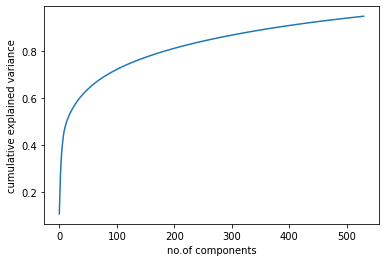

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no.of components')
plt.ylabel('cumulative explained variance')

In [62]:
# After applying PCA, the no.of features are reduced from 20531 to 530, without much information loss. 
# PCA improves processing time for very large datasets having many number of columns.
x_pca.shape

(801, 530)

## Clustering 

Clustering is an unsupervised learning technique, which helps to find patterns in the data. We use clustering here to visualize how the datapoints cluster with each other and how many clusters are possible.

### K- Means Clustering

This is a centroid based clustering algorithm. It gets the no.of clusters as input and assigns a random center to each of the clusters.  
It then reassigns each data point to the center closest to it, using Euclidean distance as the metric. 
After each reassignment, it recalculates the center of that cluster. The whole process is repeated until the reassignment of data points doesn’t change the cluster centers.

In [63]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(x_pca)
labels = km.labels_
centers = km.cluster_centers_
print(labels[:30])

[2 1 2 2 3 2 0 2 3 2 3 0 2 1 3 3 1 0 0 2 3 0 1 3 0 1 4 3 1 3]


#### PCA to 2 axes for plotting

After PCA, we are left with 530 features and visualizing the clusters on a 530-dimensional feature space will be impossible. So, we will do PCA again to reduce the dimensions to two principal components and plot the data points.

In [64]:
pca = PCA(n_components=2)
bc_pca = pca.fit_transform(x_scaled)

In [65]:
pca.explained_variance_ratio_

array([0.10539781, 0.08754232])

In [66]:
y = np.array(y)

#### Visualizing Cancer Clusters

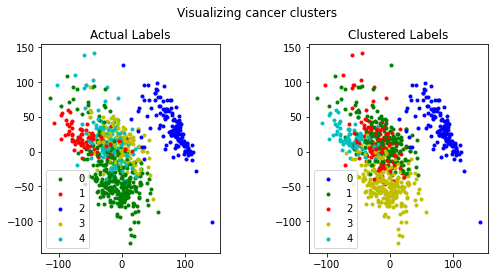

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')
for i in range(len(y)):
 if y[i] == 0:
  c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
 if y[i] == 1:
  c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.') 
 if y[i] == 2:
  c3 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
 if y[i] == 3:
  c4 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='y', marker='.')
 if y[i] == 4:
  c5 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='c', marker='.')

 if labels[i] == 0:
  c6 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
 if labels[i] == 1:
  c7 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
 if labels[i] == 2:
  c8 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
 if labels[i] == 3:
  c9 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='y', marker='.')
 if labels[i] == 4:
  c10 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='c', marker='.')
  
l1 = ax1.legend([c1, c2,c3,c4,c5], ['0', '1','2','3','4'])
l2 = ax2.legend([c6,c7,c8,c9, c10], ['0', '1','2','3','4'])

One important point to note is that the cluster label values or the colors have no significance. The labels are just values to 
distinguish cluster data points from each other. If we run this process again, we can see that the labels and colors are different.  



#### The Elbow Method for finding optimal K

In [68]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_scaled)
    distortions.append(kmeanModel.inertia_)


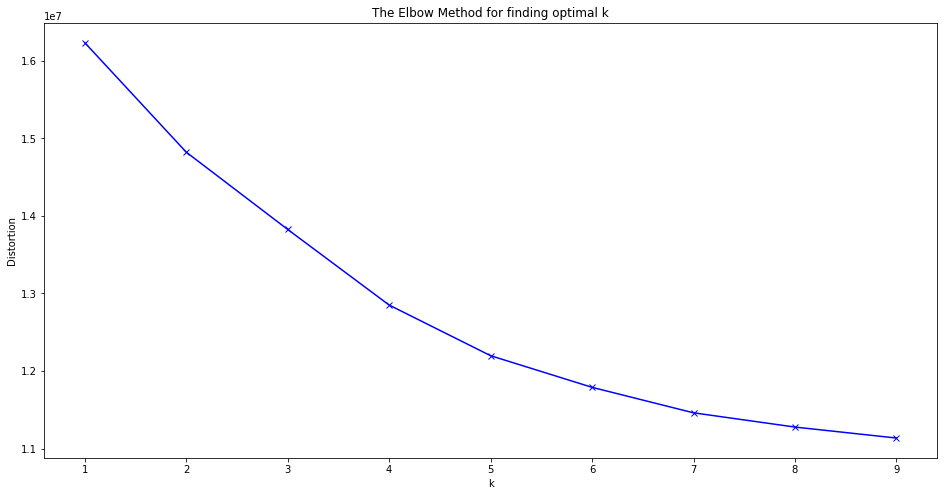

In [69]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method for finding optimal k')
plt.show()


#### Disadvantages of K-Means Clustering:


The main disadvantage of k-means clustering in unsupervised learning is, we need to have some idea about the number of clusters. We can use the elbow method to predict the number of clusters, but looking at the graph above, we can see that there is no proper elbow.  
In our project, since we have the labels, we know there are five clusters. But if we dont have any prior knowledge about the number of clusters we expect to see, k-means clustering is very difficult.
In this case, it is better to use other clustering algorithms like Hierarchical Clustering.

### Hierarchical Clustering

In Hierarchical Clustering, each data point will start as its own cluster and data points will be merged together based on various linkage criteria. Here, we use "Ward" as merge criteria. 

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)

In [71]:
Z = linkage(x_pca, 'ward')
print(Z) 

[[  67.          265.           55.1537368     2.        ]
 [ 499.          565.           56.41362428    2.        ]
 [ 242.          684.           56.44929514    2.        ]
 ...
 [1594.         1597.         1340.53172058  508.        ]
 [1596.         1598.         1432.57597889  656.        ]
 [1592.         1599.         1668.6079738   801.        ]]


The linkage matrix contains the history of which data points were merged into which cluster during each iteration. If n is no.of samples,there are n-1 rows. Each row in the matrix has four columns.
the first two columns are either data points or cluster labels that are being merged, the third column is the cluster distance between the first two column values, and the last column is the total number of data points in the 
cluster once the merge is complete.

In [72]:
Z.shape

(800, 4)

#### Dendrogram

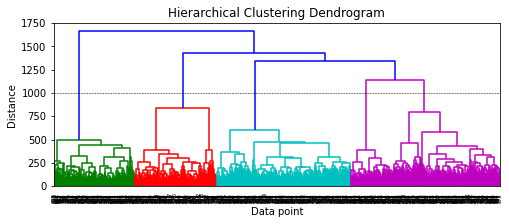

In [73]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1000, c='k', ls='--', lw=0.5)
plt.show() 


Hierarchical clustering can be represented by a dendrogram. The different colors shows the different clusters that were identified. Above figure shows 5 different colors - blue,green,red,cyan and pink. This means 5 clusters have been identified. Also, we know that there are 5 different labels. So, the hierarchical clustering has done a better job in identifying the clusters.

In [74]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1000
hc_labels = fcluster(Z, max_dist, criterion='distance') 


In [75]:
from matplotlib.mathtext import HCentered
np.unique(hc_labels)

array([1, 2, 3, 4, 5], dtype=int32)

#### Visualizing Cancer Clusters

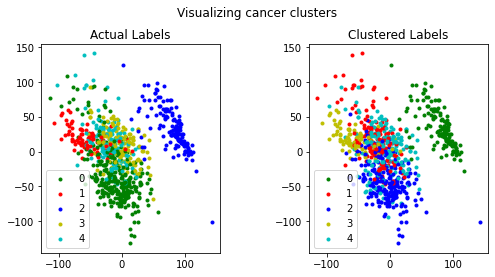

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')
for i in range(len(y)):
 if y[i] == 0:
  c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
 if y[i] == 1:
  c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.') 
 if y[i] == 2:
  c3 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
 if y[i] == 3:
  c4 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='y', marker='.')
 if y[i] == 4:
  c5 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='c', marker='.')

 if hc_labels[i] == 1:
  c6 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
 if hc_labels[i] == 2:
  c7 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
 if hc_labels[i] == 3:
  c8 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
 if hc_labels[i] == 4:
  c9 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='y', marker='.')
 if hc_labels[i] == 5:
  c10 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='c', marker='.')
  
l1 = ax1.legend([c1, c2,c3,c4,c5], ['0', '1','2','3','4'])
l2 = ax2.legend([c6,c7,c8,c9, c10], ['0', '1','2','3','4'])

We see five distinct clusters.The colors and label numbers are different. But these colors are just to distinguish the clusters and don’t mean anything. The advantage of this method is that you do not need to input the number of clusters beforehand and the model tries to find it from the underlying data.

### Clustering Genes

In the previous steps, we did clustering analysis for the samples. We found that the samples form five clusters, indicating 5 different cancer types. Now we try applying clustering to the genes. For this, we take a transpose of the matrix. So, the genes become rows and samples become columns.

In [77]:
df = df.drop('sample',axis=1)

In [78]:
df['Class_le'] = df[['Class']].apply(LabelEncoder().fit_transform)


In [79]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class,Class_le
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD,4
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD,3
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD,4
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD,4
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA,0
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD,3
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD,1
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD,4


In [80]:

df_new = df.drop({'Class','Class_le'},axis=1)

In [81]:
df_T =df_new.T

In [82]:
df_T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
gene_1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
gene_2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
gene_3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
gene_20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
gene_20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794
gene_20529,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,4.759151,...,7.313500,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716


#### Hierarchical Clustering

Since we have no clue about the no.of clusters to expect when clustering genes, we apply hierarchical clustering instead of k-means clustering.

In [83]:
Z = linkage(df_T, 'ward')
print(Z) 


[[    5.            23.             0.             2.        ]
 [ 4370.         20531.             0.             3.        ]
 [ 4808.         20532.             0.             4.        ]
 ...
 [41049.         41055.          3992.9859227   7274.        ]
 [41056.         41058.          7988.01683275 14332.        ]
 [41057.         41059.         19069.11081148 20531.        ]]


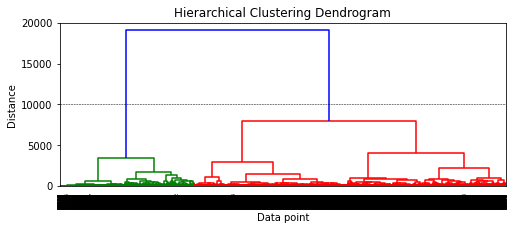

In [84]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show() 


In [85]:
from scipy.cluster.hierarchy import fcluster
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance') 
np.unique(hc_labels)

array([1, 2], dtype=int32)

We can see that the algorithm identiifed 2 clusters when clustering the genes.

In [125]:
hc_labels[:50]


array([1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1], dtype=int32)

In [126]:
df_T["cluster_class"] = hc_labels


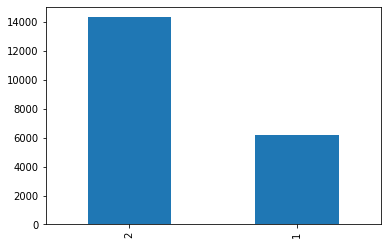

In [127]:
df_T['cluster_class'].value_counts().plot(kind='bar')


In [128]:
pca = PCA(n_components=2)
pca_df_T = pca.fit_transform(df_T)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [129]:
y = df_T['cluster_class']


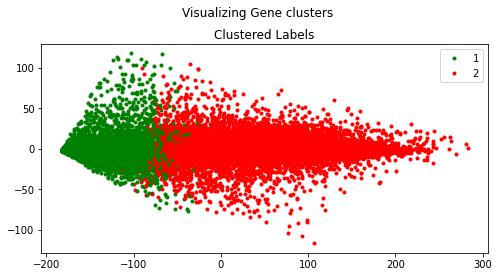

In [130]:

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
fig.suptitle('Visualizing Gene clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Clustered Labels')
for i in range(len(y)):
  if hc_labels[i] == 1:
    c1 = ax1.scatter(pca_df_T[i,0], pca_df_T[i,1],c='g', marker='.')
  if hc_labels[i] == 2:
    c2 = ax1.scatter(pca_df_T[i,0], pca_df_T[i,1],c='r', marker='.')
 
  
l1 = ax1.legend([c1, c2], ['1','2'])



### Hierarchically Clustered Heatmap

Lets plot the cluster map for the dataframe. We only consider features from 5000 to 10000 since the no.of features is very large.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


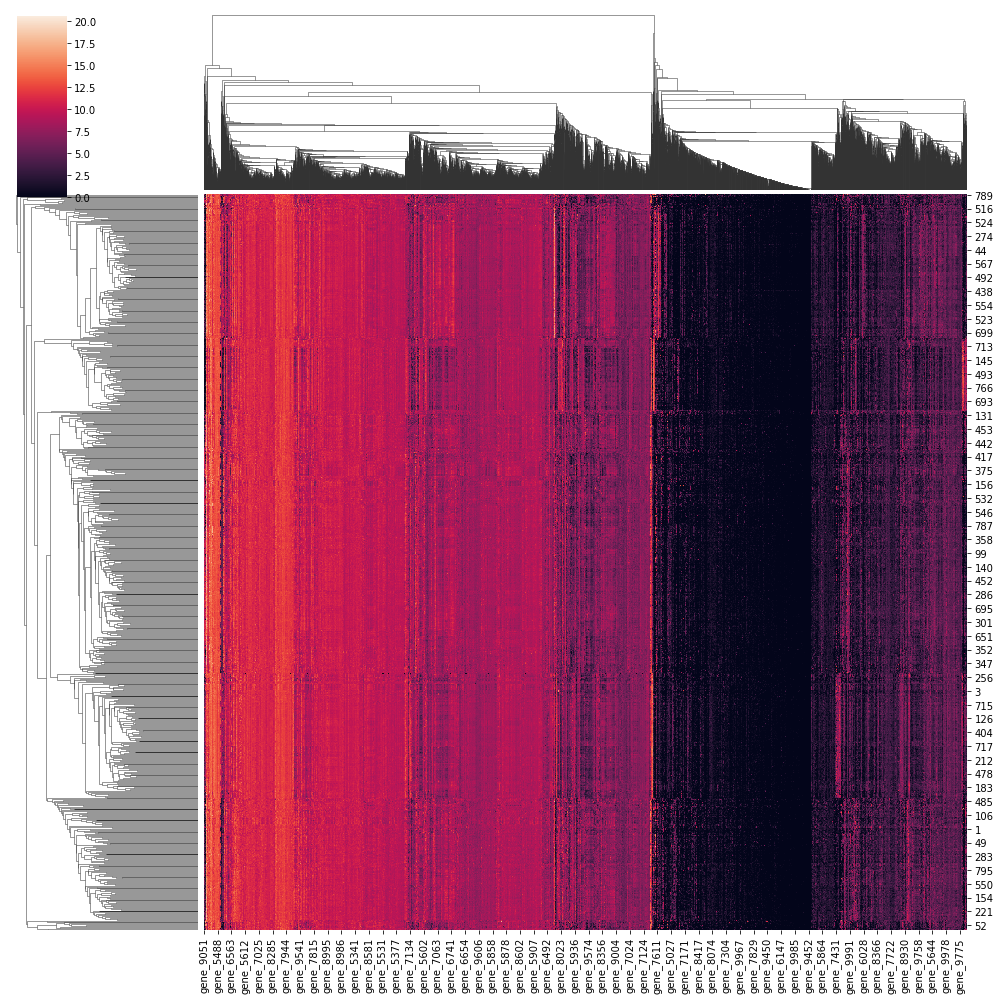

In [123]:
sns.clustermap(df.iloc[:,5000:10000], figsize=(14,14))

## Hypothesis Testing

Here null hypothesis is none of the genes have any relation with the cancer type. Alternate hypothesis is, some subset of genes have a relation with the type of cancer caused. We calculate the p-value which is the evidence against null hypothesis. If p-value is less than 5% significance level, we reject the null hypothesis and accept the alternate hypothesis.

### ANOVA Test

We need to see if the mean of a subset of genes vary significantly among the different cancer types.One way to prove or disprove the difference in mean among subsets of data is to use 
the one-way ANOVA test. ANOVA stands for “analysis of variance". It can be used to analyze if the differences among means of various groups is statistically significant or not.

In [94]:
from scipy import stats
F, p = stats.f_oneway(df[df['Class'] == 'BRCA']['gene_4'], 
df[df['Class'] == 'KIRC']['gene_4'], 
df[df['Class'] == 'LUAD']['gene_4'],
df[df['Class'] == 'PRAD']['gene_4'],
df[df['Class'] == 'COAD']['gene_4'])
print('ANOVA test for mean gene_4 values across different cancer types')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(df[df['Class'] == 'BRCA']['gene_2608'], 
df[df['Class'] == 'KIRC']['gene_2608'], 
df[df['Class'] == 'LUAD']['gene_2608'],
df[df['Class'] == 'PRAD']['gene_2608'],
df[df['Class'] == 'COAD']['gene_2608'])
print('\nANOVA test for mean gene_2608 values across different cancer types')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(df[df['Class'] == 'BRCA']['gene_8293'], 
df[df['Class'] == 'KIRC']['gene_8293'], 
df[df['Class'] == 'LUAD']['gene_8293'],
df[df['Class'] == 'PRAD']['gene_8293'],
df[df['Class'] == 'COAD']['gene_8293'])
print('\nANOVA test for mean gene_8293 values across different cancer types')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean gene_4 values across different cancer types
F Statistic: 37.117862382489406 	p-value: 1.7436875514223022e-28

ANOVA test for mean gene_2608 values across different cancer types
F Statistic: 40.97068239153788 	p-value: 3.0137620212676134e-31

ANOVA test for mean gene_8293 values across different cancer types
F Statistic: 3.9261565435007104 	p-value: 0.0036519699715061573


We test a subset of genes and find that all the p-values are less than 0.05. So we reject the null hypothesis and accept the alternate hypothesis. This means that the genes DO HAVE a relation to the type of cancer.

##### visualizing gene expression values based on the cancer type

Text(0, 0.5, 'gene 8293')

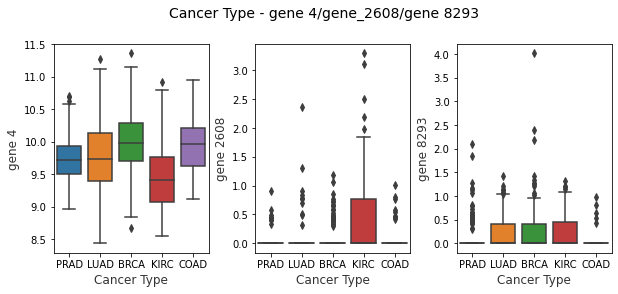

In [95]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
f.suptitle('Cancer Type - gene 4/gene_2608/gene 8293', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)
sns.boxplot(x="Class", y="gene_4",
 data=df, ax=ax1)
ax1.set_xlabel("Cancer Type",size = 12,alpha=0.8)
ax1.set_ylabel("gene 4",size = 12,alpha=0.8)

sns.boxplot(x="Class", y="gene_2608",
 data=df, ax=ax2)
ax2.set_xlabel("Cancer Type",size = 12,alpha=0.8)
ax2.set_ylabel("gene 2608",size = 12,alpha=0.8)

sns.boxplot(x="Class", y="gene_8293",
 data=df, ax=ax3)
ax3.set_xlabel("Cancer Type",size = 12,alpha=0.8)
ax3.set_ylabel("gene 8293",size = 12,alpha=0.8)

## Building Classification Models

### Splitting dataset into train and test

In [96]:
print(x_pca)

[[-57.44698695  95.41098073  74.30154327 ...   0.54818474  -1.50120174
   -1.72333213]
 [-16.91943005   0.73247033 -64.07289959 ...   0.85504347   4.95667115
    0.06800145]
 [-70.34521789 -19.3033266   20.48824046 ...   1.06332262   1.02386737
   -1.25341991]
 ...
 [ -4.13308968  15.69001387 -22.64445347 ...  -0.12917771  -0.34277414
    0.45147868]
 [-30.81475746  33.52642255  70.56563586 ...   1.52723916  -0.11206243
    0.15279044]
 [-22.34455668   4.05235632  32.3278757  ...   2.19367065   3.86106929
    0.07993974]]


In [97]:
y = y_label.apply(LabelEncoder().fit_transform)
y = np.array(y).reshape(-1)

In [98]:
# Split the data into training and testing data - 70% train and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x_pca, y, test_size = 0.3, random_state = 100)

In [99]:
print(X_train.shape)
print(type(X_train))
print(X_test.shape)
print(type(X_test))

print(y_train.shape)
print(type(y_train))
print(y_test.shape)
print(type(y_test))

(560, 530)
<class 'numpy.ndarray'>
(241, 530)
<class 'numpy.ndarray'>
(560,)
<class 'numpy.ndarray'>
(241,)
<class 'numpy.ndarray'>


### SVM Classifier

Support Vector Machine is a maximal margin classifier. It represents all the data points such that different categories are divided by a large gap. We use gridsearchCV  to select the best hyperparameters for building the model.

#### HyperParameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_parameters = {'kernel': ['linear', 'rbf'], 
 'gamma': [1e-3, 1e-4],
 'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# hyperparameter tuning for accuracy\n")
# cross -validation used is 5 fold
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# accuracy scores for all the models
print("accuracy scores:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
 print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

# best model
print("\nBest parameters set found on:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# hyperparameter tuning for accuracy

accuracy scores:

0.99821 (+/-0.00714) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.37679 (+/-0.00714) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.93214 (+/-0.03113) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.37679 (+/-0.00714) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.94286 (+/-0.03312) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.37679 (+/-0.00714) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.94286 (+/-0.03312) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.99821 (+/-0.00714) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.37679 (+/-0.00714) for {'C': 100, 

#### Performance for Test Data

In [101]:
gs_best = clf.best_estimator_
y_pred = gs_best.predict(X_test)

In [102]:
y_pred

array([0, 3, 3, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 4,
       1, 0, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 3, 0, 0, 0, 3, 4, 0,
       0, 3, 2, 0, 4, 0, 4, 1, 3, 3, 4, 0, 3, 2, 0, 4, 0, 1, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3, 3, 2,
       4, 0, 2, 2, 0, 0, 4, 1, 2, 0, 2, 2, 0, 2, 4, 2, 1, 0, 3, 3, 3, 0,
       0, 2, 0, 2, 1, 4, 2, 3, 2, 1, 3, 0, 0, 4, 0, 4, 3, 1, 1, 4, 2, 3,
       4, 2, 0, 0, 0, 3, 3, 0, 4, 2, 1, 2, 0, 1, 0, 2, 4, 2, 4, 2, 1, 2,
       3, 2, 3, 1, 2, 3, 2, 1, 2, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 4, 2, 1,
       0, 4, 4, 4, 0, 2, 0, 0, 4, 3, 3, 0, 3, 0, 1, 4, 0, 2, 4, 2, 2, 0,
       0, 2, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 2, 4, 0, 2, 0, 0, 4, 2, 3,
       0, 3, 3, 2, 2, 4, 4, 2, 0, 4, 0, 0, 0, 3, 1, 3, 3, 0, 0, 2, 0])

In [103]:
y_test

array([0, 3, 3, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 4,
       1, 0, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 3, 0, 0, 0, 3, 4, 0,
       0, 3, 2, 0, 4, 0, 4, 1, 3, 3, 4, 0, 3, 2, 0, 4, 0, 1, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3, 3, 2,
       4, 0, 2, 2, 0, 0, 4, 1, 2, 0, 2, 2, 0, 2, 4, 2, 1, 0, 3, 3, 3, 0,
       0, 2, 0, 2, 1, 4, 2, 3, 2, 1, 3, 0, 0, 4, 0, 4, 3, 1, 1, 4, 2, 3,
       4, 2, 0, 0, 0, 3, 3, 0, 4, 2, 1, 2, 0, 1, 0, 2, 4, 2, 4, 2, 1, 2,
       3, 2, 3, 1, 2, 3, 2, 1, 2, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 4, 2, 1,
       0, 4, 4, 4, 0, 2, 0, 0, 4, 3, 3, 0, 3, 0, 1, 4, 0, 2, 4, 2, 2, 0,
       0, 2, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 2, 4, 0, 2, 0, 0, 4, 2, 3,
       0, 3, 3, 2, 2, 4, 4, 2, 0, 4, 0, 0, 0, 3, 1, 3, 3, 0, 0, 2, 0])

In [104]:
print("test accuracy for SVM \n", classification_report(y_pred,y_test))
print("Confusion matrix for SVM \n", confusion_matrix(y_pred,y_test))

test accuracy for SVM 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        43

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Confusion matrix for SVM 
 [[89  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 45  0  0]
 [ 0  0  0 45  0]
 [ 0  0  0  0 43]]


### Random Forest Classifier

#### HyperParameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
 {'n_estimators': [100,200,500], 'max_features': ['auto', 'sqrt', 'log2']},
 ]
forest_gs = RandomForestClassifier(random_state=42,n_jobs=-1)
grid_search = GridSearchCV(forest_gs, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 500]}],
             scoring='accuracy')

#### Best Parameters

In [106]:
grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 500}

#### Performance for train data

In [107]:
rf = grid_search.best_estimator_
y_pred_forest = cross_val_predict(rf, X_train, y_train, cv=5)
print("accuracy score for train data \n", accuracy_score(y_train,y_pred_forest))
print("classification report for train data \n", classification_report(y_train,y_pred_forest))

accuracy score for train data 
 0.8839285714285714
classification report for train data 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       211
           1       1.00      0.78      0.88        59
           2       1.00      0.89      0.94       101
           3       0.97      0.69      0.80        96
           4       1.00      0.88      0.94        93

    accuracy                           0.88       560
   macro avg       0.95      0.85      0.89       560
weighted avg       0.91      0.88      0.88       560



In [108]:
print("confusion matrix for train data \n", confusion_matrix(y_train,y_pred_forest))

confusion matrix for train data 
 [[211   0   0   0   0]
 [ 12  46   0   1   0]
 [ 11   0  90   0   0]
 [ 30   0   0  66   0]
 [ 10   0   0   1  82]]


#### Performance for test data

In [109]:
y_pred_test =  rf.predict(X_test)

In [110]:
print("test accuracy for RF \n", classification_report(y_pred_test,y_test))
print("Confusion matrix for RF \n", confusion_matrix(y_pred_test,y_test))

test accuracy for RF 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       114
           1       0.84      1.00      0.91        16
           2       0.91      1.00      0.95        41
           3       0.62      1.00      0.77        28
           4       0.98      1.00      0.99        42

    accuracy                           0.90       241
   macro avg       0.87      0.96      0.90       241
weighted avg       0.93      0.90      0.90       241

Confusion matrix for RF 
 [[89  3  4 17  1]
 [ 0 16  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 42]]


We can see that the accuracy of Random Forest Classifier is 90%. This is not very effective. Let us try othr models to improve this accuracy.

### Deep Neural Network

In [111]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = tf.keras.utils.to_categorical(le.fit_transform(y_train))
y_test = tf.keras.utils.to_categorical(le.fit_transform(y_test))

In [112]:
import tensorflow as tf
num_classes = 5
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],), name='Flatten'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(13, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 530)               0         
                                                                 
 dense (Dense)               (None, 12)                6372      
                                                                 
 dense_1 (Dense)             (None, 13)                169       
                                                                 
 dense_2 (Dense)             (None, 5)                 70        
                                                                 
Total params: 6,611
Trainable params: 6,611
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [122]:
mdl_history = model.fit(X_train, y_train,
         epochs= 50, validation_split=0.1)
         

Epoch 1/50
16/16 [==============================] - 1s 20ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2565 - val_accuracy: 0.9286
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2383 - val_accuracy: 0.9286
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 2.5073e-04 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9286
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1.6189e-04 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9286
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1.0862e-04 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 0.9286
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 8.0768e-05 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 0.9286
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 6.5902e-05 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9286

Text(0, 0.5, 'Accuracy')

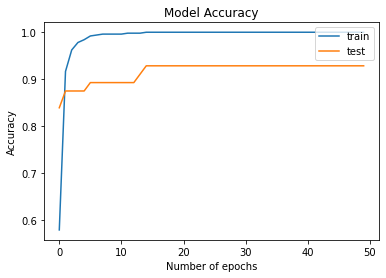

In [115]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc = 'upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [116]:
y_pred_test = np.argmax(model.predict(X_test), axis=1)
y_pred_test

array([0, 3, 3, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 4,
       1, 0, 0, 1, 4, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 3, 0, 0, 0, 3, 4, 0,
       0, 3, 2, 0, 4, 0, 4, 3, 3, 3, 4, 0, 3, 2, 0, 4, 0, 1, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 4, 0, 3, 4, 0, 3, 3, 0, 0, 0, 2, 3, 0, 0, 3, 3, 2,
       4, 0, 2, 2, 0, 0, 4, 1, 2, 0, 2, 2, 0, 3, 4, 2, 1, 0, 0, 3, 3, 3,
       0, 2, 0, 2, 1, 4, 2, 3, 2, 1, 3, 0, 0, 4, 0, 4, 3, 1, 1, 4, 2, 3,
       4, 2, 0, 0, 0, 3, 3, 0, 4, 2, 1, 2, 0, 1, 0, 2, 4, 2, 4, 2, 1, 2,
       3, 2, 3, 1, 2, 3, 2, 1, 2, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 4, 2, 1,
       0, 4, 4, 4, 0, 2, 0, 0, 4, 3, 3, 0, 3, 0, 1, 4, 0, 2, 4, 2, 3, 0,
       0, 2, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 2, 4, 0, 2, 0, 0, 4, 2, 3,
       0, 3, 3, 2, 2, 4, 4, 2, 0, 4, 0, 0, 0, 3, 1, 3, 3, 0, 0, 2, 0])

In [119]:
y_test = np.argmax(y_test,axis=1)

In [120]:
print("test accuracy for DNN \n", classification_report(y_pred_test,y_test))
print("Confusion matrix for DNN \n", confusion_matrix(y_pred_test,y_test))

test accuracy for DNN 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        87
           1       0.95      0.95      0.95        19
           2       0.96      1.00      0.98        43
           3       0.96      0.88      0.91        49
           4       1.00      1.00      1.00        43

    accuracy                           0.97       241
   macro avg       0.96      0.96      0.96       241
weighted avg       0.97      0.97      0.97       241

Confusion matrix for DNN 
 [[86  0  0  1  0]
 [ 0 18  0  1  0]
 [ 0  0 43  0  0]
 [ 3  1  2 43  0]
 [ 0  0  0  0 43]]


# Conclusion

In this Project, we analyzed the gene dataset causing different types of cancers.  We reduced the dimensionality of the dataset by performing PCA. We did unsupervised learning by finding patterns in the data using Clustering techniques. We buit classification models like SVM, Random Forest and Deep Neural Network. We can conclude that the SVMis the winner among the three models with accuracy of 100%. This indicates that we have built an effective model which can classify different cancer types.